## Julia Primer 

This is a crash course on the Julia that you will need to know to complete the homeworks in this class. We are going to keep everything as simple as possible in the homeworks, oftentimes at the expense of speed. Because of this, we are going to be writing Julia in a way that is very similar to matlab. 

The great Brian Jackson (former TA of this course) made a fantastic [Julia Intro](https://github.com/Optimal-Control-16-745/JuliaIntro) that goes over everything one should know on their way to becoming a solid Julia programmer. This primer is simply a supplementary guide, and is not meant to replace the existing [Julia Intro](https://github.com/Optimal-Control-16-745/JuliaIntro). 

In [1]:
# some basic path stuff

dir =  @__DIR__ # this is the path to the directory
dir_of_dir = dirname(@__DIR__) # this is the path to the directory of the directory
madeup_path = joinpath(dir, "made_up_file.jl")

@show dir 
@show dir_of_dir
@show madeup_path

dir = "/Users/kevintracy/devel/HW0_S23"
dir_of_dir = "/Users/kevintracy/devel"
madeup_path = "/Users/kevintracy/devel/HW0_S23/made_up_file.jl"


"/Users/kevintracy/devel/HW0_S23/made_up_file.jl"

In [2]:
# show current environment (list out the packages in the environment with status)
import Pkg 
Pkg.status()

      Status `~/devel/HW0_S23/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [6a86dc24] FiniteDiff v2.17.0
  [f6369f11] ForwardDiff v0.10.34
  [91a5bcdd] Plots v1.38.2


In [3]:
# first we are going to activate a specific environment 
Pkg.activate(@__DIR__) # activate the env in the directory 

# now we can add a package if we want 
Pkg.add("BenchmarkTools")

  Activating environment at `~/devel/HW0_S23/Project.toml`
    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/devel/HW0_S23/Project.toml`
  No Changes to `~/devel/HW0_S23/Manifest.toml`


In [4]:
# we can also instantiate the environment 
Pkg.instantiate()      # download the packages listed in this environment 

In [5]:
# standard library stuff (not env specific)
# import LinearAlgebra # LinearAlgebra.norm()
# import LinearAlegbra as la # la.norm()
using LinearAlgebra # norm()
using Test

## 1. General syntax and Linear Algebra

In [6]:
a = 2 
b = 3.4
c = rand()  # uniform [0, 1]
d = randn() # gaussian [0, 1]

@show a 
@show a * b 
@show a ^ 2 
@show a + b; # jupyter always outputs the last thing in a cell, we can supress with ; 

a = 2
a * b = 6.8
a ^ 2 = 4
a + b = 5.4


In [7]:
# julia people love using latex characters 
Ω = 4.5 # I did this with "\Omega<tab>"

# we can also add dots 
ẋ = 2.4; # I did this with "x\dot<tab>"

In [8]:
# arrays 
vec = [1,2,3,4.0]  # vector, colons or commas work
mat = [1 2; 3 4.0] # matrix, must use colons between rows 

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

In [9]:
vec[1:2] # indexing starts at 1 

2-element Vector{Float64}:
 1.0
 2.0

In [10]:
mat[:, 2] # all rows, 2nd column 

2-element Vector{Float64}:
 2.0
 4.0

In [11]:
# whenever I pull something 1 dimensional from a matrix, it will treat it as a vector
mat[2,1:2] # row 2, columns 1:2 (automatically converts to vector)

2-element Vector{Float64}:
 3.0
 4.0

In [12]:
reshape(mat[2,1:2], 1, 2) # if we want a matrix we can get it like this

1×2 Matrix{Float64}:
 3.0  4.0

In [13]:
# I can edit these elements 
vec[3] = 100;
@show vec 

mat[1,1] = 20
@show mat

vec = [1.0, 2.0, 100.0, 4.0]
mat = [20.0 2.0; 3.0 4.0]


2×2 Matrix{Float64}:
 20.0  2.0
  3.0  4.0

In [14]:
# matrix multiplication
A = randn(2,2)
B = randn(2,2)
C = A * B 
D = A' * A # ' is transpose 

2×2 Matrix{Float64}:
  0.89624   -0.229467
 -0.229467   0.126318

In [15]:
# matrix vector multiplication 
A = randn(2,2)
b = randn(2)
c = A * b 
d = b' * A 

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 2.08429  -1.49287

In [16]:
size(A)

(2, 2)

In [17]:
size(b)

(2,)

In [18]:
# identity matrix is just I 
@show identity_2x2 = I(2) # we can specify a size 

@show zeros(2,2) + I # or we can just add it to something with I 

identity_2x2 = I(2) = Bool[1 0; 0 1]
zeros(2, 2) + I = [1.0 0.0; 0.0 1.0]


2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

### 1.1 Solving Linear Systems

In [19]:
# now let's solve some linear systems 
# A * x = b 

x = inv(A)*b # you SHOULD NOT solve linear systems like this 

x = A\b # you SHOULD solve them like this 

@test norm(A*x - b) < 1e-10 

Test Passed

In [20]:
# matrix factorizations (advanced usage) 

# if I know something about the structure of my linear system, I can 
# choose how to factorize is 

A = randn(3,3); A = A'*A + I; # create a random positive definite matrix 
# this just means it will work for all factorizations

# cholesky is the fastest factorization, but only works on positive definite matrices
chol_factor = cholesky(A) # factorize into L*L'=A, where L is lower triangular
L = chol_factor.L # this is the lower triangular cholesky factor 
@test norm(L*L' - A) < 1e-10

# some other popular options that work for all full rank square matrices: 
qr_factor = qr(A)
Q = qr_factor.Q 
R = qr_factor.R 
@test norm(Q*R - A) < 1e-10

# LU decomposition 
lu_factor = lu(A)
L = lu_factor.L 
U = lu_factor.U 
@test norm(L*U - A) < 1e-10 

Test Passed

In [21]:
# I can solve this linear system with these factors 
b = randn(3)

# solve x = A\b using our factors 
x1 = chol_factor\b 
x2 = qr_factor\b 
x3 = lu_factor\b 

@test norm(x1 - x2) < 1e-10 
@test norm(x1 - x3) < 1e-10 

Test Passed

In [22]:
# ranges 
idx = 0:2:10                   # unit range
idx = range(0, 10, step = 2)   # same as above 
idx = range(0, 10, length = 6) # same as above 

0.0:2.0:10.0

## 2. Functions and Types

In [23]:
# for loops 
for i = 1:2
    println("here is println output: ",i) # print line 
    @show i 
end

here is println output: 1
i = 1
here is println output: 2
i = 2


In [24]:
# basic type information:
a = randn(2)::Vector{Float64}
@show typeof(a) # what type is a
@show eltype(a) # what element type is a 

typeof(a) = Vector{Float64}
eltype(a) = Float64


Float64

In [25]:
b = [1, 3]
@show typeof(b) # what type is a
@show eltype(b) # what element type is a 

typeof(b) = Vector{Int64}
eltype(b) = Int64


Int64

In [26]:
# some other types you will see 
A = randn(2,2)::Matrix{Float64} # this is a type assertion
B = [1 0; 0 3]::Matrix{Int64}
a = 4.3::Float64 

4.3

In [27]:
randn(2,2)::Matrix{Int64} # type assertion will fail because randn creates floats

LoadError: TypeError: in typeassert, expected Matrix{Int64}, got a value of type Matrix{Float64}

In [28]:
# list comprehension
x = [i for i = 1:3]

3-element Vector{Int64}:
 1
 2
 3

In [29]:
# we love vectors of vectors 
X = [randn(2) for i = 1:3]

3-element Vector{Vector{Float64}}:
 [0.20057338019977922, 1.8104438518371635]
 [-0.40741407960537884, 0.05015390284395696]
 [-0.7725170398684563, 0.5072417467207656]

In [30]:
# we will use this for trajectories all the time, we can convert a vector of vectors 
# to a matrix with the following
X_matrix = hcat(X...) # this is the same as hcat(X[1],X[2],X[3])

2×3 Matrix{Float64}:
 0.200573  -0.407414   -0.772517
 1.81044    0.0501539   0.507242

In [31]:
# we can also do vectors of matrices 
X = [randn(2,2) for i = 1:3]

3-element Vector{Matrix{Float64}}:
 [0.567777949618872 1.2229993560274488; 0.808325053397487 -0.9322738912158703]
 [0.9911407644450111 -1.5486531134906936; 0.6730314829545021 -1.4512523966382327]
 [-0.41177367257175035 0.39908573723717217; 0.8340196879117514 0.013470266841446596]

In [32]:
# functions 
function f(x, b) 
    return b*x 
end

output = f(randn(3), 2.4)

3-element Vector{Float64}:
  1.0964763894910283
 -6.830293536259821
  1.4505574401691943

In [33]:
# we can type the inputs and outputs to a function if we want to
function f2(x::Vector, b::Float64)::Matrix
    # this takes in the following:
    #     x - a vector (can be a vector of anything)
    #     b - a float 
    # and outputs a matrix (of anything)
    return b * x * x'
end

output = f2(randn(3), 2.4)

3×3 Matrix{Float64}:
 4.09084   0.314278   2.12773
 0.314278  0.0241443  0.163462
 2.12773   0.163462   1.10667

In [34]:
# this is useful for 2 reasons:
# 1. it helps us avoid bugs by specifying the types we expect 
# 2. it allows for multiple dispatch

# here's what I mean by multiple dispatch
function print_my_type(a::Float64)
    println("thanks for inputting a ~float~")
end
print_my_type(3.4)

thanks for inputting a ~float~


In [35]:
# but if I give it an integer, it won't be able to find the function 
print_my_type(3)

LoadError: MethodError: no method matching print_my_type(::Int64)
[0mClosest candidates are:
[0m  print_my_type([91m::Float64[39m) at In[34]:6

In [36]:
# this error is saying it doesn't have a method for `print_my_type(::Int64)`
# but the closest it found was `print_my_type(::Float64)`

# so let's write a new one 
function print_my_type(a::Int64)
    println("thanks for inputting an ~integer~")
end
print_my_type(3)

# these two functions have the same name, so the version that gets 
# called is determined by the type of the input 

thanks for inputting an ~integer~


## 2. Things to watch out for

In [37]:
# global and local scope 

# everything so far has been in global scope, this means if I create a variable 
x = 4.6 

function myf()
    println("i'm printing x, even though it wasn't passed in")
    print("x: ",x)
end

myf()

i'm printing x, even though it wasn't passed in
x: 4.6

In [38]:
# this is super dangerous, and as a result global variables should NEVER be used 

# --------UNLESS------------
# we make it a const, which means we can't change it 

const x_const = 4.3

# now we should feel free to use it wherever

4.3

In [39]:
# to avoid "polluting" our workspace with global variables, we often times 
# wrap things in a let end 

function test_local_scope()
    # since there are no inputs to this function, it will 
    # only know about global variables 
    
    println("here is global_var: ", global_var)
    println("here is local_var: ", local_var) # this will fail 
end

# global variable 
const global_var = 23

let 
    
    # local variable 
    local_var = 45 
    
    test_local_scope()
    
end

here is global_var: 23


LoadError: UndefVarError: local_var not defined

In [40]:
# here is an example of global
x = 3.4 
function f1()
    if @isdefined(x)
        println("yeah I know about x")
        println("x: ", x)
    end
end
f1()

yeah I know about x
x: 3.4


In [41]:
# functions can modify their inputs in place
# this is not true in MATLAB, but is true in python 
function mutating_function!(input::Vector)
    input[2] = 140
    return nothing 
end

let 
    input = [5,9]
    println("input before: ", input)
    
    # call our function which modifies the input 
    mutating_function!(input)
    
    println("input after: ", input)
end

input before: [5, 9]
input after: [5, 140]


In [42]:
# functions that modify the input have a ! at the end of the title 
x = [4, 1, 3, 2]
println("here is x: x = ", x)
println("here is the sorted version of x: ", sort(x))
println("but x is unchanged: x = ", x) 

# now I will sort the vector in place 
sort!(x) # ! means it will modify the input 
println("here is the modified x (it's sorted now): x = ", x)

here is x: x = [4, 1, 3, 2]
here is the sorted version of x: [1, 2, 3, 4]
but x is unchanged: x = [4, 1, 3, 2]
here is the modified x (it's sorted now): x = [1, 2, 3, 4]


In [43]:
# we can apply any function to elements of an array with a . 
@show abs(3)
x = randn(4)
@show x
@show abs.(x)
X = randn(2,2)
@show X 
@show abs.(X)

abs(3) = 3
x = [-0.11128792651002428, -0.015877561968819773, 0.3854315910822585, -2.5569332527480264]
abs.(x) = [0.11128792651002428, 0.015877561968819773, 0.3854315910822585, 2.5569332527480264]
X = [-1.239806533387557 -1.2923328757551396; 1.4721225274097767 -0.6917022229557495]
abs.(X) = [1.239806533387557 1.2923328757551396; 1.4721225274097767 0.6917022229557495]


2×2 Matrix{Float64}:
 1.23981  1.29233
 1.47212  0.691702

In [44]:
# even a vector of vectors 
X = [randn(2) for i = 1:3]

@show X
@show norm.(X)

X = [[1.441101600633353, 0.5793805356783365], [-0.5748002298511509, 1.84758138195673], [1.7798909001991032, 1.4096528647650541]]
norm.(X) = [1.553208172934629, 1.9349295251223173, 2.2704917563717113]


3-element Vector{Float64}:
 1.553208172934629
 1.9349295251223173
 2.2704917563717113

## 3. Plotting

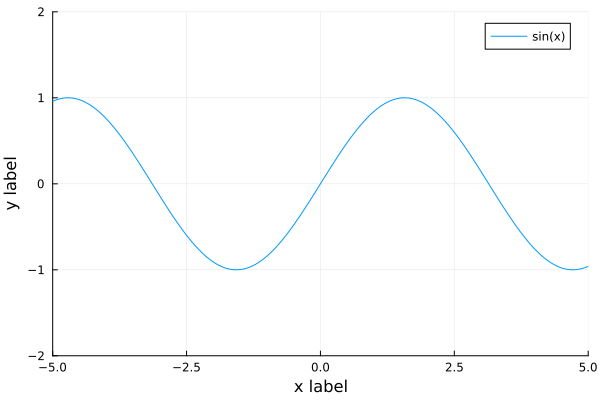

In [45]:
# plotting 
using Plots 

# our first plot is just a normal one 
x = -10:.001:10 
plot(x, sin.(x), label = "sin(x)", xlabel = "x label",
     ylabel = "y label", xlim = (-5,5), ylim = (-2, 2))

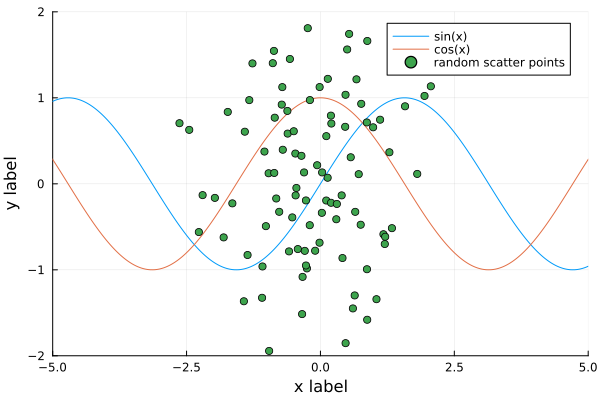

In [46]:
# now let's plot multiple 
plot(x, sin.(x), label = "sin(x)", xlabel = "x label",
     ylabel = "y label", xlim = (-5,5), ylim = (-2, 2))
# now I use plot! to modify my existing plot
plot!(x, cos.(x), label = "cos(x)")
scatter!(randn(100), randn(100), label = "random scatter points")

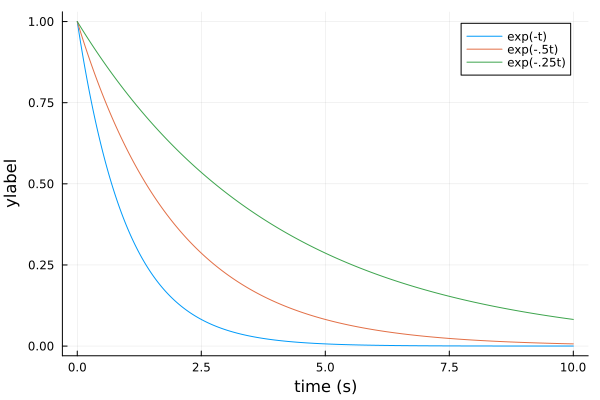

In [47]:
# now let's plot a trajectory that's stored as vector of vectors 
time_vec = 0:.01:10 

# create a trajectory as a vector of vectors 
X = [[exp(-t), exp(-.5*t), exp(-.25*t)] for t in time_vec]

# convert this vector of vectors to a matrix 
Xmatrix = hcat(X...)

# plot this (DONT FORGET THE TRANSPOSE)
plot(time_vec, Xmatrix', label = ["exp(-t)" "exp(-.5t)" "exp(-.25t)"],
     ylabel = "ylabel", xlabel = "time (s)")

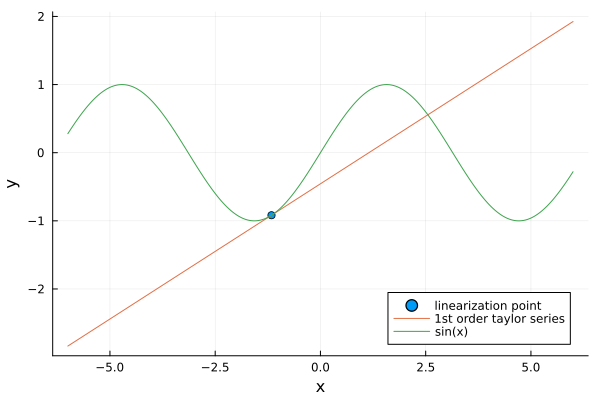

In [48]:
import ForwardDiff as FD

function first_order_taylor(f::Function, x̄::Float64, x::Float64)::Float64
    # first order taylor series of f, 
    return f(x̄) + FD.derivative(f,x̄)*(x - x̄)
end

let 
    
    x = -6:.01:6
    y = sin.(x)
    
    # let's linearize about a random point 
    x̄ = randn()

    y_taylor = [first_order_taylor(sin, x̄, x[i]) for i = 1:length(x)]
    # y_taylor = [first_order_taylor(sin, x̄, xi) for xi in x] # you can also do this 
    
    scatter([x̄], [sin(x̄)], label = "linearization point")
    plot!(x, y_taylor, label = "1st order taylor series")
    display(plot!(x,y, label = "sin(x)", xlabel = "x", ylabel = "y"))
    
end

In [49]:
# NamedTuples 
params = (a = 5, b = 6, c = 7)
@show params.c

params.c = 7


7

In [50]:
# we can't change these 
params.c = 5

LoadError: setfield! immutable struct of type NamedTuple cannot be changed